In [0]:
# This notenook for generating and plotting images of our CGAN models

In [0]:
# example of loading the generator model and generating images
import numpy
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.models import load_model
from numpy import savez_compressed
import os
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/deeplearning/")
!ls

In this section, we will use the trained generator model to conditionally generate new photos of celebA faces. We can update our code example for generating new images with the model to now generate images conditional on the class label. 

The first step is to load the saved model and confirm that it can generate plausible faces. The model can be loaded using the load model() function in the Keras API. We can then generate a number of random points in the latent space and use them as input to the loaded model to generate new faces. The faces can then be plotted. 

In [0]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=4):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [0]:
# create and save a plot of generated images
def save_plot(examples, labels, epoch, n=3):
    # scale from [-1,1] to [0,1]
    examples = (examples + 1) / 2.0
    # plot images
    for i in range(n * n):
        # define subplot
        fig = plt.subplot(n, n, 1 + i)
        strLabel = str(labels[i])
        # turn off axis
        fig.axis('off')
        fig.text(8.0,20.0,strLabel, fontsize=6, color='white')
        # plot raw pixel data
        fig.imshow(examples[i])
    # save plot to file
    #filename = 'results/test_images/generated_plot_data_e%03d.png' % (epoch)
    #plt.savefig(filename)
    plt.show()
    plt.close()

In [0]:
#Generation of Latent Points For 4 Categories Model
qSaveModel = False
if qSaveModel:
    # load model
    model = load_model("results/models/generator_model_200.h5")
    # generate points in latent space
    latent_points = generate_latent_points(100, 100)
    # save points
    savez_compressed("results/latent_points/latent_points_100.npz", latent_points)

We can explore the latent space by performing vector arithmetic with the generated faces. First, we must generate a large number of faces and save both the faces and their corresponding latent vectors. We can then review the plot of generated faces and select faces with features we’re interested in, note their index (number), and retrieve their latent space vectors for manipulation.

We know that the categories are as follows:

0 = featured as attractive and female and not high cheek bone and not large lips
1 = featured as attractive and male
2 = featured as attractive and female and high cheek bone
3 = featured as attractive and female and not high cheek bone and large lips

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


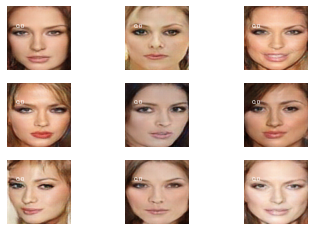

In [11]:
#Load the model and plot the generated images for 4 catgeories model
model = load_model("results/models/generator_model_200.h5")
CGAN_data_file = "results/latent_points/latent_points_100.npz"
latent_points = numpy.load(CGAN_data_file)["arr_0"]
#Generation of Image Plots
epoch = 1
# generate images
category = 0
labels = numpy.ones(100)*category
#labels = randint(1, 3, 100)
print(labels[0:9])
examples = model.predict([latent_points, labels])
save_plot(examples, labels, epoch, n=3)

In [0]:
#Generation of Latent Points For Independent Multi Categories Model
qSaveModel = False
if qSaveModel:
    # load model
    model = load_model("results_2/models/generator_model_200.h5")
    # generate points in latent space
    latent_points = generate_latent_points(100, 100)
    # save points
    savez_compressed("results_2/latent_points/latent_points_100.npz", latent_points)

Categories:
'Arched_Eyebrows' = 1,
'Bags_Under_Eyes' = 2,
'Bangs' = 3,
'Big_Lips' = 4,
'Big_Nose' = 5,
'Black_Hair' = 6,
'Blond_Hair' = 7,
'Brown_Hair' = 8,
'Bushy_Eyebrows' = 9,
'Eyeglasses' = 10,
'Goatee' = 11,
'Heavy_Makeup' = 12,
'High_Cheekbones' = 13,
'Male' = 14,
'Mouth_Slightly_Open' = 15,
'Mustache' = 16,
'Narrow_Eyes' = 17,
'No_Beard' = 18,
'Oval_Face' = 19,
'Pale_Skin' = 20,
'Pointy_Nose' = 21,
'Receding_Hairline' = 22,
'Rosy_Cheeks' = 23,
'Sideburns' = 24,
'Smiling' = 25,
'Straight_Hair' = 26,
'Wavy_Hair' = 27,
'Wearing_Earrings' = 28,
'Wearing_Lipstick' = 29,
'Wearing_Necklace' = 30,
'Female' = 31

[10. 10. 10. 10. 10. 10. 10. 10. 10.]


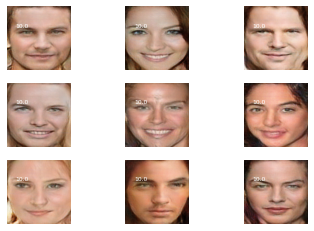

In [12]:
#Load the model and plot the generated images for Independent Multi Categories Model
model = load_model("results_2/models/generator_model_200.h5")
CGAN_data_file = "results_2/latent_points/latent_points_100.npz"
latent_points = numpy.load(CGAN_data_file)["arr_0"]
#Generation of Image Plots
epoch = 1
# generate images
#Select Category according to the above given categories
category = 10
labels = numpy.ones(100)*category
#labels = randint(1, 3, 100)
print(labels[0:9])
examples = model.predict([latent_points, labels])
save_plot(examples, labels, epoch, n=3)

In [0]:
#Generation of Latent Points For MultiClass Categories Model
qSaveModel = False
if qSaveModel:
    # load model
    model = load_model("results_3/models/generator_model_200.h5")
    # generate points in latent space
    latent_points = generate_latent_points(100, 100)
    # save points
    savez_compressed("results_3/latent_points/latent_points_100.npz", latent_points)

Categories:
'5_o_Clock_Shadow' = 1,
'Arched_Eyebrows' = 2,
'Attractive' = 3,
'Bags_Under_Eyes' = 4,
'Bangs' = 5,
'Big_Lips' = 6,
'Big_Nose' = 7,
'Black_Hair' = 8,
'Blond_Hair' = 9,
'Brown_Hair' = 10,
'Bushy_Eyebrows' = 11,
'Eyeglasses' = 12,
'Goatee' = 13,
'Heavy_Makeup' = 14,
'High_Cheekbones' = 15,
'Male' = 16,
'Mouth_Slightly_Open' = 17,
'Mustache' = 18,
'Narrow_Eyes' = 19,
'No_Beard' = 20,
'Oval_Face' = 21,
'Pale_Skin' = 22,
'Pointy_Nose' = 23,
'Receding_Hairline' = 24,
'Rosy_Cheeks' = 25,
'Sideburns' = 26,
'Smiling' = 27,
'Straight_Hair' = 28,
'Wavy_Hair' = 29,
'Wearing_Earrings' = 30,
'Wearing_Lipstick' = 31,
'Wearing_Necklace' = 32,
'Young' = 33,
'Female' = 34

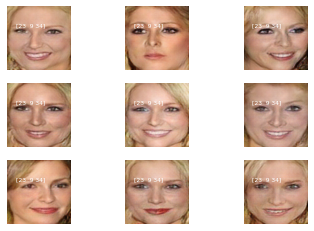

In [13]:
#Load the model and plot the generated images for Independent Multi Categories Model
model = load_model("results_3/models/generator_model_200.h5")
CGAN_data_file = "results_3/latent_points/latent_points_100.npz"
latent_points = numpy.load(CGAN_data_file)["arr_0"]
#Generation of Image Plots
epoch = 1
# generate images by seleting a three element array of categories from above given categories
category = [23,9,34]
list = []
for i in range(0,100):
  list.append(category)
labels = numpy.array(list) 
#labels = randint(1, 3, 100)
#print(labels[0:9])
examples = model.predict([latent_points, labels])
save_plot(examples, labels, epoch, n=3)

In [0]:
#Generation of Latent Points For Independent Multi Categories Model
qSaveModel = False
if qSaveModel:
    # load model
    model = load_model("results_4/models/generator_model_200.h5")
    # generate points in latent space
    latent_points = generate_latent_points(100, 100)
    # save points
    savez_compressed("results_4/latent_points/latent_points_100.npz", latent_points)

Categories: 'Arched_Eyebrows' = 1, 'Bags_Under_Eyes' = 2, 'Bangs' = 3, 'Big_Lips' = 4, 'Big_Nose' = 5, 'Black_Hair' = 6, 'Blond_Hair' = 7, 'Brown_Hair' = 8, 'Bushy_Eyebrows' = 9, 'Eyeglasses' = 10, 'Goatee' = 11, 'Heavy_Makeup' = 12, 'High_Cheekbones' = 13, 'Male' = 14, 'Mouth_Slightly_Open' = 15, 'Mustache' = 16, 'Narrow_Eyes' = 17, 'No_Beard' = 18, 'Oval_Face' = 19, 'Pale_Skin' = 20, 'Pointy_Nose' = 21, 'Receding_Hairline' = 22, 'Rosy_Cheeks' = 23, 'Sideburns' = 24, 'Smiling' = 25, 'Straight_Hair' = 26, 'Wavy_Hair' = 27, 'Wearing_Earrings' = 28, 'Wearing_Lipstick' = 29, 'Wearing_Necklace' = 30, 'Female' = 31

[10. 10. 10. 10. 10. 10. 10. 10. 10.]


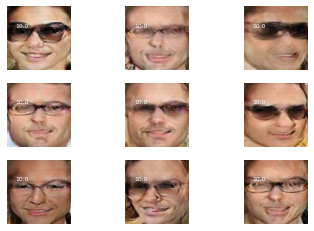

In [14]:
#Load the model and plot the generated images for Independent Multi Categories Model
model = load_model("results_4/models/generator_model_200.h5")
CGAN_data_file = "results_4/latent_points/latent_points_100.npz"
latent_points = numpy.load(CGAN_data_file)["arr_0"]
#Generation of Image Plots
epoch = 1
# generate images
#Select Category according to the above given categories
category = 10
labels = numpy.ones(100)*category
#labels = randint(1, 3, 100)
print(labels[0:9])
examples = model.predict([latent_points, labels])
save_plot(examples, labels, epoch, n=3)

In [0]:
#Generation of Latent Points For Independent Multi Categories Model
qSaveModel = False
if qSaveModel:
    # load model
    model = load_model("results_5/models/generator_model_200.h5")
    # generate points in latent space
    latent_points = generate_latent_points(100, 100)
    # save points
    savez_compressed("results_5/latent_points/latent_points_100.npz", latent_points)

Categories: '5_o_Clock_Shadow' = 1, 'Arched_Eyebrows' = 2, 'Attractive' = 3, 'Bags_Under_Eyes' = 4, 'Bangs' = 5, 'Big_Lips' = 6, 'Big_Nose' = 7, 'Black_Hair' = 8, 'Blond_Hair' = 9, 'Brown_Hair' = 10, 'Bushy_Eyebrows' = 11, 'Eyeglasses' = 12, 'Goatee' = 13, 'Heavy_Makeup' = 14, 'High_Cheekbones' = 15, 'Male' = 16, 'Mouth_Slightly_Open' = 17, 'Mustache' = 18, 'Narrow_Eyes' = 19, 'No_Beard' = 20, 'Oval_Face' = 21, 'Pale_Skin' = 22, 'Pointy_Nose' = 23, 'Receding_Hairline' = 24, 'Rosy_Cheeks' = 25, 'Sideburns' = 26, 'Smiling' = 27, 'Straight_Hair' = 28, 'Wavy_Hair' = 29, 'Wearing_Earrings' = 30, 'Wearing_Lipstick' = 31, 'Wearing_Necklace' = 32, 'Young' = 33, 'Female' = 34

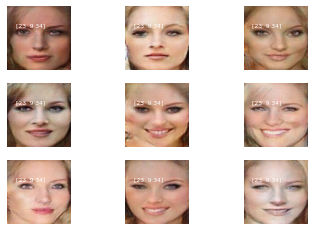

In [0]:
#Load the model and plot the generated images for Independent Multi Categories Model
model = load_model("results_5/models/generator_model_200.h5")
CGAN_data_file = "results_5/latent_points/latent_points_100.npz"
latent_points = numpy.load(CGAN_data_file)["arr_0"]
#Generation of Image Plots
epoch = 1
# generate images by seleting a three element array of categories from above given categories
category = [23,9,34]
list = []
for i in range(0,100):
  list.append(category)
labels = numpy.array(list) 
#labels = randint(1, 3, 100)
#print(labels[0:9])
examples = model.predict([latent_points, labels])
save_plot(examples, labels, epoch, n=3)

In [0]:
#Generation of Latent Points For 4 Categories Model
qSaveModel = False
if qSaveModel:
    # load model
    model = load_model("results_6/models/generator_model_200.h5")
    # generate points in latent space
    latent_points = generate_latent_points(100, 100)
    # save points
    savez_compressed("results_6/latent_points/latent_points_100.npz", latent_points)

Categories: 0 = featured as attractive and female and not high cheek bone and not large lips 1 = featured as attractive and male 2 = featured as attractive and female and high cheek bone 3 = featured as attractive and female and not high cheek bone and large lips

[1 2 2 1 1 1 2 1 1]


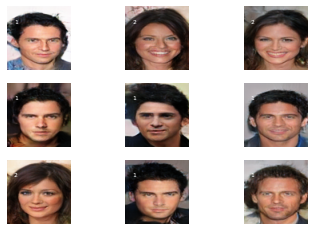

In [0]:
#Load the model and plot the generated images for 4 catgeories model
model = load_model("results_6/models/generator_model_200.h5")
CGAN_data_file = "results_6/latent_points/latent_points_100.npz"
latent_points = numpy.load(CGAN_data_file)["arr_0"]
#Generation of Image Plots
epoch = 1
# generate images
# category = 3
# labels = numpy.ones(100)*category
labels = randint(1, 3, 100)
print(labels[0:9])
examples = model.predict([latent_points, labels])
save_plot(examples, labels, epoch, n=3)

In [0]:
#Generation of Latent Points For Independent Multi Categories Model
qSaveModel = False
if qSaveModel:
    # load model
    model = load_model("results_7/models/generator_model_250.h5")
    # generate points in latent space
    latent_points = generate_latent_points(100, 100)
    # save points
    savez_compressed("results_7/latent_points/latent_points_100.npz", latent_points)

Categories: 'Arched_Eyebrows' = 1, 'Bags_Under_Eyes' = 2, 'Bangs' = 3, 'Big_Lips' = 4, 'Big_Nose' = 5, 'Black_Hair' = 6, 'Blond_Hair' = 7, 'Brown_Hair' = 8, 'Bushy_Eyebrows' = 9, 'Eyeglasses' = 10, 'Goatee' = 11, 'Heavy_Makeup' = 12, 'High_Cheekbones' = 13, 'Male' = 14, 'Mouth_Slightly_Open' = 15, 'Mustache' = 16, 'Narrow_Eyes' = 17, 'No_Beard' = 18, 'Oval_Face' = 19, 'Pale_Skin' = 20, 'Pointy_Nose' = 21, 'Receding_Hairline' = 22, 'Rosy_Cheeks' = 23, 'Sideburns' = 24, 'Smiling' = 25, 'Straight_Hair' = 26, 'Wavy_Hair' = 27, 'Wearing_Earrings' = 28, 'Wearing_Lipstick' = 29, 'Wearing_Necklace' = 30, 'Female' = 31

[10. 10. 10. 10. 10. 10. 10. 10. 10.]


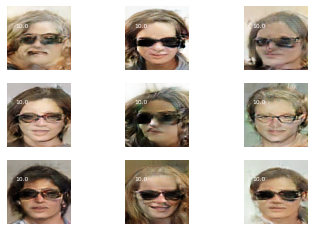

In [15]:
#Load the model and plot the generated images for Independent Multi Categories Model
model = load_model("results_7/models/generator_model_250.h5")
CGAN_data_file = "results_7/latent_points/latent_points_100.npz"
latent_points = numpy.load(CGAN_data_file)["arr_0"]
#Generation of Image Plots
epoch = 1
# generate images
#Select Category according to the above given categories
category = 10
labels = numpy.ones(100)*category
#labels = randint(1, 3, 100)
print(labels[0:9])
examples = model.predict([latent_points, labels])
save_plot(examples, labels, epoch, n=3)